# Descriptive Statistics Review

## Context

![img](./diamonds.jpg)


The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#your code here
diamonds = pd.read_csv(r'C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_2\Project_Week_4\diamonds.csv')


# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
#your code here
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#depth = (2*z/(x+y))*100
#depth*(x+y)/2/100
59.8*(3.89+3.84)/2/100


2.31127

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [5]:
#your code here
"""
the values displayed in the head of the data seem to represent low quality diamonds
the Carat range goes from 0.2 to 5.01 and here we only have observations of 0.2 or 0.3, 
so very close to the lower range
After this, we can observe that the other dimensions are coherent: the price is at its lowest (~330)
the clarity is low
The color does not seem to be correlated with the carat or price since we have E diamonds which is the 
second best value
The daimond dimensions are equivalent 
"""

'\nthe values displayed in the head of the data seem to represent low quality diamonds\nthe Carat range goes from 0.2 to 5.01 and here we only have observations of 0.2 or 0.3, \nso very close to the lower range\nAfter this, we can observe that the other dimensions are coherent: the price is at its lowest (~330)\nthe clarity is low\nThe color does not seem to be correlated with the carat or price since we have E diamonds which is the \nsecond best value\nThe daimond dimensions are equivalent \n'

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [6]:
#your code here
diamonds.shape
"""
We have 53940 rows , 11 columns
"""

'\nWe have 53940 rows , 11 columns\n'

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [7]:
#your code here
diamonds['clarity_score']= ''
diamonds['clarity_score']=np.where(diamonds['clarity']=='I1',0,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='SI2',1,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='SI1',2,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='VS2',3,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='VS1',4,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='VVS2',5,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='VVS1',6,diamonds['clarity_score'])
diamonds['clarity_score']=np.where(diamonds['clarity']=='IF',7,diamonds['clarity_score'])

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [8]:
#your code here
diamonds['color_score']= ''
diamonds['color_score']=np.where(diamonds['color']=='J',0,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='I',1,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='H',2,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='G',3,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='F',4,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='E',5,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='D',6,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='C',7,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='B',8,diamonds['color_score'])
diamonds['color_score']=np.where(diamonds['color']=='A',9,diamonds['color_score'])

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [9]:
#your code here
diamonds.info()
"""
We have 3 types of data in the dataset : int, float and object (for categorical data)
It seems like we do not have any null data
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53940 non-null  float64
 9   y              53940 non-null  float64
 10  z              53940 non-null  float64
 11  clarity_score  53940 non-null  object 
 12  color_score    53940 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 5.4+ MB


'\nWe have 3 types of data in the dataset : int, float and object (for categorical data)\nIt seems like we do not have any null data\n'

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [10]:
#your code here
"""
All the initial columns have a datatype that match what is expected: object for categorical data
float or int for numerical data
The 2 columns we added (clarity_score and color_score) have object type where they could have int type
Changing the data type hereunder
"""
diamonds["clarity_score"] = diamonds["clarity_score"].astype(str).astype(int)
diamonds["color_score"] = diamonds["color_score"].astype(str).astype(int)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53940 non-null  float64
 9   y              53940 non-null  float64
 10  z              53940 non-null  float64
 11  clarity_score  53940 non-null  int32  
 12  color_score    53940 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(3)
memory usage: 4.9+ MB


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [11]:
#your code and comments here
diamonds.describe()
"""
Carat : mean and median are quite close. 75% is 1.04 and max is 5 which means we probably have outliers
depth: 50% of the values are located within 61 and 62.5, with min 43 and max 79 so we have a big peak around our mean value of 61.75
price : outliers close to max values as median is quite different from mean and must be pulled by these
x/y/z/clarity_score/color_score all have a min value of 0 which indicates maybe false data ? diamonds are 3d so should have X,Y,Z values
outliers here to, certainly linked to price outlier (big diamond = high price) 
"""

'\nCarat : mean and median are quite close. 75% is 1.04 and max is 5 which means we probably have outliers\ndepth: 50% of the values are located within 61 and 62.5, with min 43 and max 79 so we have a big peak around our mean value of 61.75\nprice : outliers close to max values as median is quite different from mean and must be pulled by these\nx/y/z/clarity_score/color_score all have a min value of 0 which indicates maybe false data ? diamonds are 3d so should have X,Y,Z values\noutliers here to, certainly linked to price outlier (big diamond = high price) \n'

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [12]:
#your code here
diamonds[diamonds['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,1,4
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,3,2
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,4,3
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,3,3
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,6,6
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,1,2
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,4
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,4


In [13]:
diamonds[diamonds['y']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0,3,2
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0,4,3
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0,3,3
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0,6,6
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0,1,2
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,1,4
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,1,4


In [14]:
empty_vals = diamonds[diamonds['z']==0]
empty_vals

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,4
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,2
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2


In [15]:
"""
all y values = 0 are also 0 for x and z 
x 0 values have 1 where y exists
z 0 values are either 0 for also x and y , or are the only missing values which makes them calculatable thanks to depth column
"""

'\nall y values = 0 are also 0 for x and z \nx 0 values have 1 where y exists\nz 0 values are either 0 for also x and y , or are the only missing values which makes them calculatable thanks to depth column\n'

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [16]:
#your code here
x= diamonds.loc[diamonds['x']==0]
x

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,1,4
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,3,2
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,4,3
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,3,3
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,6,6
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,1,2
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,4
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,4


In [17]:
"""Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)"""
def calculate_z(df, depth, x, y):
    return round(df[depth]*(df[x]+df[y])/2/100,2)

**Apply it just to the rows with incorrect values**

In [18]:
#your code here
diamonds['z']= np.where((diamonds['z']==0) & (diamonds['x']!=0),calculate_z(diamonds, 'depth', 'x','y'), diamonds['z'])

In [19]:
diamonds['x'].isnull().sum()

0

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [20]:
#your code here
diamonds['x'] =np.where(diamonds['x']==0, np.nan, diamonds['x'])


In [21]:
diamonds[diamonds['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score


In [22]:
diamonds.dropna(inplace=True)

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [23]:
#your code here
#depth = 2*z/(x+y)*100
def validate_z(df,depth, z, x, y):
    df['depth2'] = round((df[z]*2/(df[x]+df[y])*100),1)
    for i in df.index:
        if df[depth][i] != df['depth'][i]:
            print(df[depth][i],df[depth][i])
        else:
            return 


In [24]:
#realizing some data from depth is not very precise so changing with  

In [ ]:
dftotest = diamonds.loc[empty_vals.index]

validate_z(dftotest,'depth','z','x','y')

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [26]:
#your code here
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_score,color_score
count,53932.00000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,26970.48804,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540266,3.051101,3.405789
std,15571.46971,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667,1.647109,1.701165
min,1.00000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.75000,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,26971.50000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.25000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,53940.00000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [27]:
#your code here
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_score,color_score
count,53932.00000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,26970.48804,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540266,3.051101,3.405789
std,15571.46971,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667,1.647109,1.701165
min,1.00000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.75000,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,26971.50000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.25000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,53940.00000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


In [28]:
#your comments here
"""
as described previously, we most certainly have outliers, considering the price, x,y,z max
"""

'\nas described previously, we most certainly have outliers, considering the price, x,y,z max\n'

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [29]:
#your code here
diamonds[diamonds['price']>5324]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
12765,12766,1.07,Ideal,E,SI2,62.2,55.0,5325,6.54,6.58,4.08,1,5
12766,12767,1.11,Ideal,H,SI1,60.6,59.0,5325,6.75,6.71,4.08,2,2
12767,12768,1.14,Premium,G,SI1,62.2,58.0,5326,6.64,6.70,4.15,2,3
12768,12769,1.07,Premium,H,VS2,62.1,59.0,5327,6.52,6.56,4.06,3,2
12769,12770,1.33,Very Good,J,SI1,64.0,53.0,5327,6.93,7.01,4.46,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,2,2
27746,27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,3
27747,27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,7,3
27748,27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2,3


In [30]:
"""
According to this filter, only the price has a great increase between the start and en of quartile
it jumps from 5327 to 18803, whereas the other columns do not have such a great spread
Outliers are clearly linked to the price
hower, we do not find the max from x and y in the max prices which is surprising
"""

'\nAccording to this filter, only the price has a great increase between the start and en of quartile\nit jumps from 5327 to 18803, whereas the other columns do not have such a great spread\nOutliers are clearly linked to the price\nhower, we do not find the max from x and y in the max prices which is surprising\n'

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

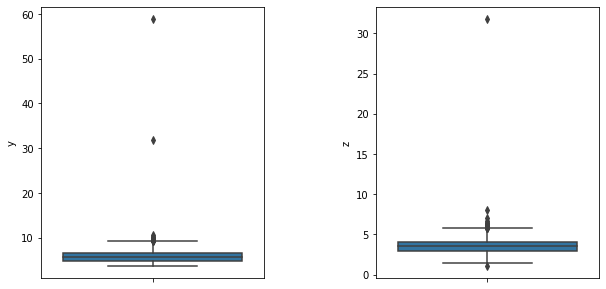

In [31]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [32]:
#your code here
diamonds[diamonds['z']>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,4,5


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [33]:
#your code here
diamonds['z']= np.where((diamonds['z']==31.8),calculate_z(diamonds, 'depth', 'x','y'), diamonds['z'])

Let's check if we actually corrected the outlier.

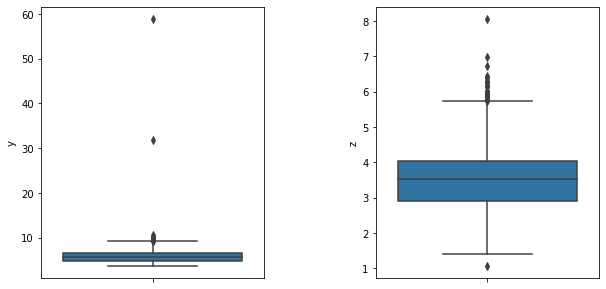

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [35]:
#your code here
validate_z(diamonds,'depth','z','x','y')

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [36]:
#your code here
diamonds[diamonds['y']>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score,depth2
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2,24.1
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1,61.0
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0,65.6
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0,65.9
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4,5,27.7


In [37]:
2*5.12/61.8*100-5.15

11.419579288025888

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [38]:
#your code here
# y= (2*z)/depth*100-x
def calculate_y(df, depth, x, z):
    return (2*df[z]/df[depth]*100-df[x])
diamonds['y']= np.where((diamonds['y']==31.8) | (diamonds['y']==58.9),calculate_y(diamonds, 'depth', 'x','z'), diamonds['y'])

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [39]:
print(diamonds.loc[49189, :])
print(diamonds.loc[24067, :])

Unnamed: 0           49190
carat                 0.51
cut                  Ideal
color                    E
clarity                VS1
depth                 61.8
table                 55.0
price                 2075
x                     5.15
y                11.419579
z                     5.12
clarity_score            4
color_score              5
depth2                27.7
Name: 49189, dtype: object
Unnamed: 0           24068
carat                  2.0
cut                Premium
color                    H
clarity                SI2
depth                 58.9
table                 57.0
price                12210
x                     8.09
y                19.278421
z                     8.06
clarity_score            1
color_score              2
depth2                24.1
Name: 24067, dtype: object


In [40]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_score,color_score,depth2
count,53932.00000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,26970.48804,0.797879,61.749336,57.457029,3932.136079,5.732007,5.734141,3.539735,3.051101,3.405789,61.748240
std,15571.46971,0.473986,1.432514,2.234064,3988.734835,1.119670,1.113272,0.692051,1.647109,1.701165,1.504792
min,1.00000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,16.100000
25%,13485.75000,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000,61.000000
50%,26971.50000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,61.800000
75%,40455.25000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000,62.500000
max,53940.00000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,7.000000,6.000000,100.700000


Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

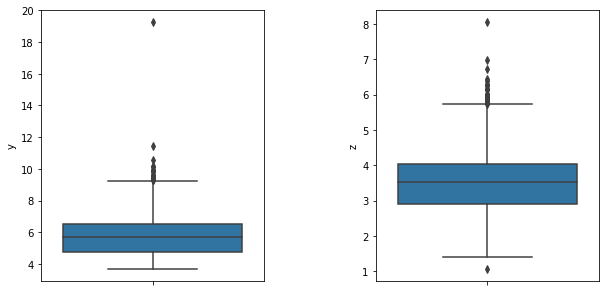

In [41]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [42]:
#your thoughts here
"""
We still have a couple outliers, after recalculating Y and dropping Z but these are more acceptable 
because closer to our main data values
"""

'\nWe still have a couple outliers, after recalculating Y and dropping Z but these are more acceptable \nbecause closer to our main data values\n'

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [43]:
#your code here
diamonds.to_csv(r'C:\Users\Sarah\Documents\IronSarah\Project 4\diamonds_clean.csv')